In [33]:
import sncosmo
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = sncosmo.load_example_data()
data

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,float64,str2
55070.0,sdssg,0.36351153597,0.672843847541,25.0,ab
55072.0512821,sdssr,-0.200801295864,0.672843847541,25.0,ab
55074.1025641,sdssi,0.307494232981,0.672843847541,25.0,ab
55076.1538462,sdssz,1.08776103656,0.672843847541,25.0,ab
55078.2051282,sdssg,-0.43667895645,0.672843847541,25.0,ab
55080.2564103,sdssr,1.09780966779,0.672843847541,25.0,ab
...,...,...,...,...,...
55137.6923077,sdssr,0.565286726579,0.672843847541,25.0,ab
55139.7435897,sdssi,3.04318346795,0.672843847541,25.0,ab


In [11]:
model = sncosmo.Model(source='salt2')
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.3, 0.7)}) 

In [14]:
model.param_names

['z', 't0', 'x0', 'x1', 'c']

In [15]:
model = sncosmo.Model(source='nugent-sn1a')
model.param_names

['z', 't0', 'amplitude']

In [16]:
model = sncosmo.Model(source='nugent-sn1bc')
model.param_names

['z', 't0', 'amplitude']

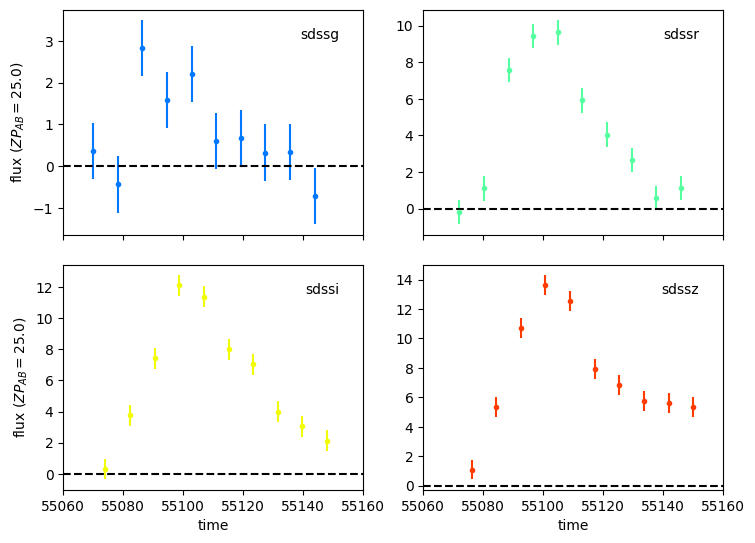

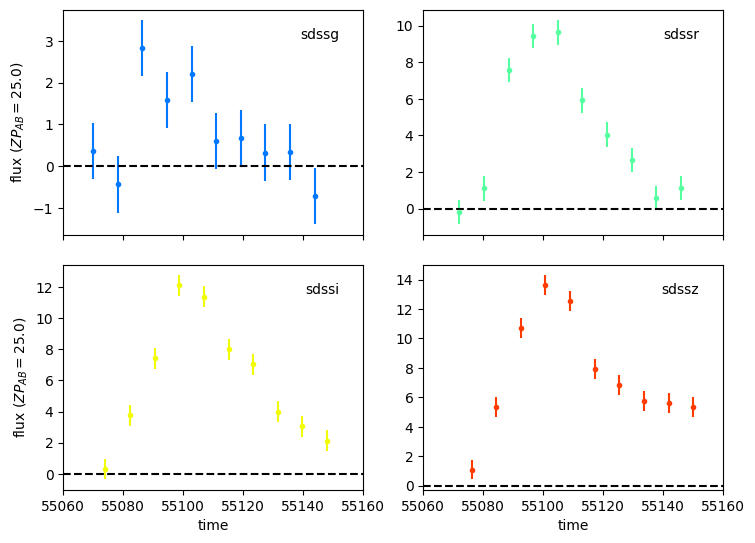

In [18]:
sncosmo.plot_lc(data)

## Arnett Model

In [49]:
t_Ni = 8.8 # days
t_Co = 111.3
t_d = 10

def integral(tprime, t_d, other_time):
    return (tprime / t_d) * np.exp(tprime**2 / t_d**2) * np.exp(-tprime/other_time)

In [50]:
eps_Ni = 3.9e10 # erg/s/g
eps_Co = 6.8e9 # erg/s/g

def arnett(t, t_d, Mni):
    Ni_integral, _ = integrate.quad(integral, 0, t, args=(t_d, t_Ni,))
    Co_integral, _ = integrate.quad(integral, 0, t, args=(t_d, t_Co,))
    
    return (2 * Mni / t_d) * np.exp(-t**2 / t_d**2) * ((eps_Ni - eps_Co) * Ni_integral + eps_Co * Co_integral)

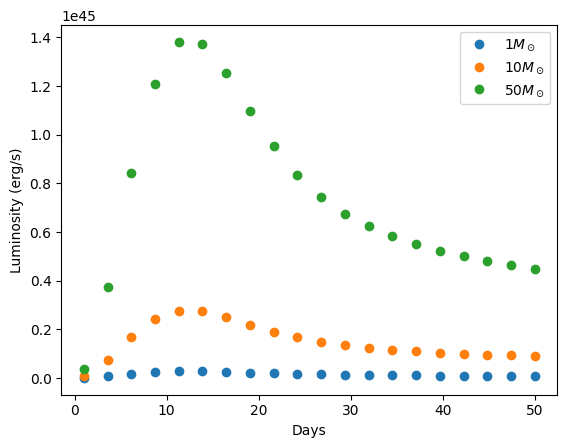

In [51]:
Msun = 2e33 # grams

times = np.linspace(1, 50, 20)
plt.plot(times, [arnett(i, 10, 1*Msun) for i in times], 'o', label="$1 M_\odot$")
plt.plot(times, [arnett(i, 10, 10*Msun) for i in times], 'o', label="$10 M_\odot$")
plt.plot(times, [arnett(i, 10, 50*Msun) for i in times], 'o', label="$50 M_\odot$")

plt.xlabel("Days")
plt.ylabel("Luminosity (erg/s)")
plt.legend()
plt.show()